<Figure size 432x288 with 0 Axes>

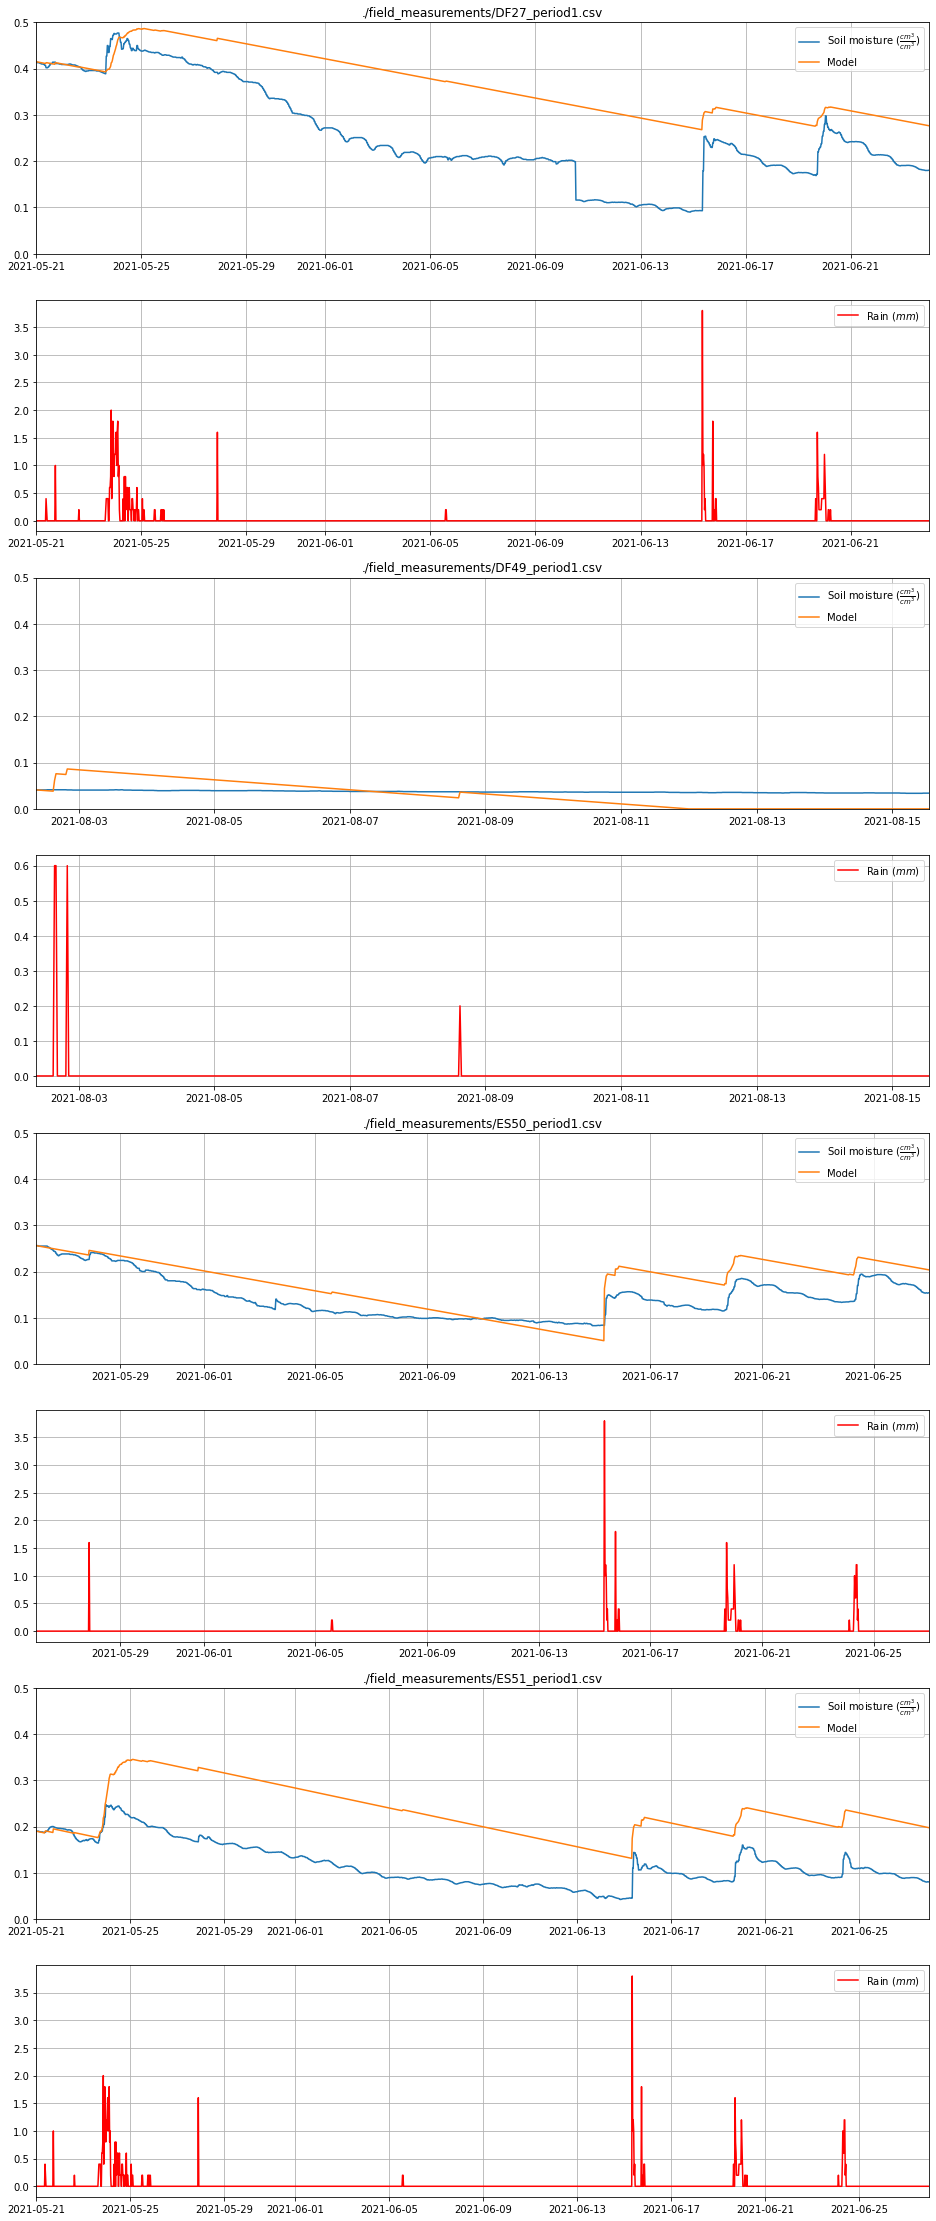

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
all_files =  [
    './field_measurements/DF27_period1.csv',
    './field_measurements/DF49_period1.csv',
    './field_measurements/ES50_period1.csv',
    './field_measurements/ES51_period1.csv'
    ]

plt.clf()
fig, axes = plt.subplots(len(all_files)*2,1, figsize=(16,10*len(all_files)))

for j,filename in enumerate(all_files):
    data = pd.read_csv(filename, parse_dates=['Unnamed: 0'])
    #print(data.columns)
    time_domain = data['Unnamed: 0'].values
    rain = data['Rain(mm)'].values
    soil_moisture = data['Soil moisture (cm3/cm3)'].values

    # Top boundary coondition model
    # θ ic cm3/cm3, rain in mm, dt in s
    # a1, a2 have units that depend on the model choice. These are used as wildcards.
    def bc(θ, rain, dt, a1, a2):
        return max(0, θ - dt*a1 + dt*a2*rain*(1/θ))

    model = np.zeros_like(rain)
    model[0] = soil_moisture[0]
    dt = 0.75
    a1 = 0.0003
    a2 = 0.002
    for i,r in enumerate(rain[1:]):
        model[i+1] = bc(model[i], r, dt, a1, a2)

    axes[j*2].set_title(filename)
    axes[j*2].plot(time_domain, soil_moisture, label='Soil moisture $(\\frac{cm^3}{cm^3})$')
    axes[j*2].plot(time_domain, model, label=f'Model')
    axes[j*2].set_xlim([time_domain.min(), time_domain.max()])
    axes[j*2].set_ylim([0, 0.5])
    axes[j*2].legend()
    axes[j*2].grid()
    axes[j*2+1].plot(time_domain, rain, label='Rain $(mm)$', color='red')
    axes[j*2+1].set_xlim([time_domain.min(), time_domain.max()])
    axes[j*2+1].legend()
    axes[j*2+1].grid()